In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print('got here')

got here


In [3]:
base_dir = 'BaseData/Validation'

In [4]:
images = []
labels = []

In [5]:
y_true = []

In [6]:
class_names = os.listdir(base_dir)
num_classes = len(class_names)

for label, class_dir in enumerate(class_names):
    class_path = os.path.join(base_dir, class_dir)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)  # Read the image
        img = cv2.resize(img, (300, 300))  # Resize to match your model input
        images.append(img)
        labels.append(label)
        y_true.append(label)
y_true = np.array(y_true)
print('got here')

got here


In [7]:
images = np.array(images)
labels = np.array(labels)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [22]:
model = keras.models.load_model('my_model_two.keras')

In [23]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 208ms/step


In [32]:
print(y_test.shape)
print(y_pred.shape)

(1175,)
(1175,)


In [33]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
print('hallo')

hallo


C:\Users\wwwad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.294468085106383
Precision: 0.4089293238549573
Recall: 0.294468085106383
F1-score: 0.28566538902226624
Confusion Matrix:
 [[17  0  1  0  0  4 12  0  0  0  0  0 16  0  0  7  2  1  0  0  0  2  0  0
   0  0  0  0]
 [ 0 12  0  8  0  6  5  0  0  0  0  5  7  2  0  1  0  0  0  0  0  0  0  2
  10  0  0  0]
 [ 0  0 17  3  0  0  7  1  0  0  0  0  4  0  0  7  3  4  0  0  0  0  0  0
   0  0  0  2]
 [ 3  2  0 14  0  0  2  0  0  2  0  1 10  0  0  3  0  0  0  0  0  3  0  4
   1  0  0  0]
 [ 0  0  0  0 52  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  6]
 [ 1  0  0  6  0  3  5  1  0  1  0  1  3  1  0  9  2  0  0  0  0  5  0  0
   9  1  1  0]
 [ 0  0  0  7  0  0 11  0  0  1  0  1  9  0  0  4  2  0  0  0  0  2  0  2
   5  0  0  0]
 [ 0  0  0  1  0  0  0 24  2  0  0  0  0  0  0  4  7  8  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  1  0  0  8 13  0  0  0  0  0  0  4  6  2  0  0  0  1  0  0
   0  0  1  0]
 [ 0  0  0  7  0  0 14  0  0  5  0  0 13  0  0  1  1  0  0  0  0  

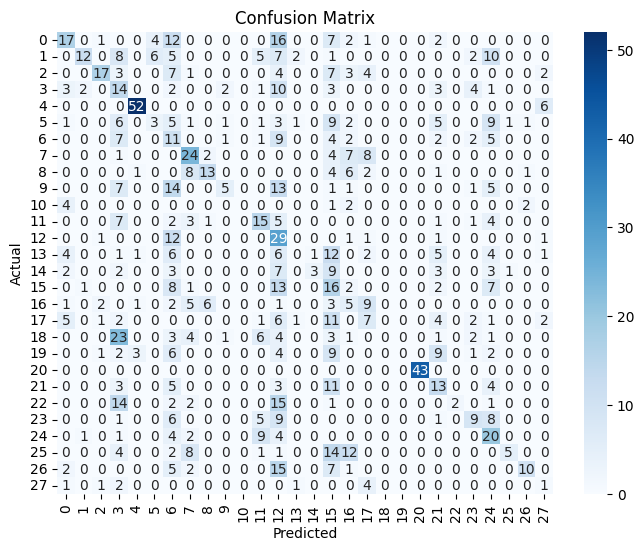

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<Axes: >

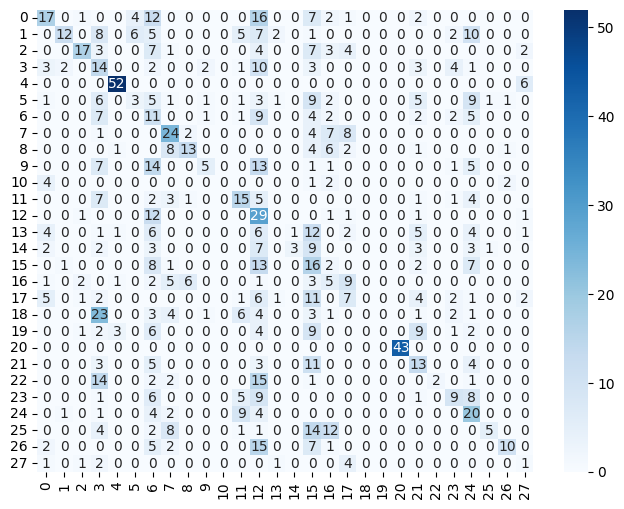

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

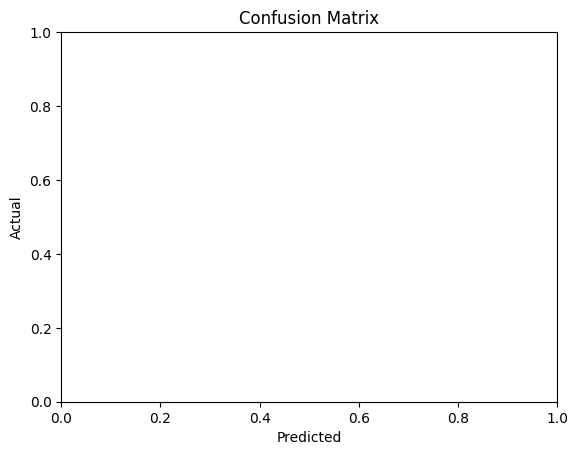

In [29]:
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()